# Introduction to Neural Networks

First, set up the environment by installing the required packages and importing the necessary functions and classes.

In [1]:
# pip install numpy tensorflow sklearn scipy
# conda install numpy tensorflow sklearn scipy

import numpy as np

from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

from tensorflow.keras import backend as K
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Input
from tensorflow.keras.losses import categorical_crossentropy
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.utils import to_categorical

## Download and prepare the data

For this introduction, the classic MNIST dataset of hand-drawn digits is used.  Download the data, reshape it if necessary, and normalize it.

In [2]:
num_classes = 10  # mnist is the 10 digits

# load the data, split between train and test sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)

X_train shape: (60000, 28, 28)
y_train shape: (60000,)


In [3]:
# Reshape data if necessary
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

# normalize the data: set pixel values to be in range [0, 1]
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255.
X_test /= 255.

print('x_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('First 10 values of y_train:', y_train[:10])

x_train shape: (60000, 28, 28, 1)
y_train shape: (60000,)
First 10 values of y_train: [5 0 4 1 9 2 1 3 1 4]


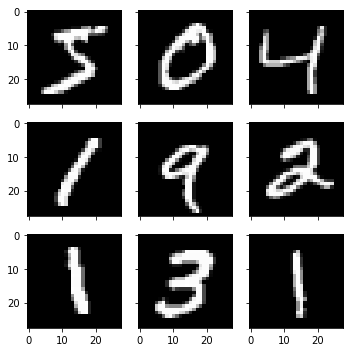

In [5]:
# View the data
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(5, 5), sharex=True, sharey=True)
ax = axes.ravel()

for i in range(0, 9):
    ax[i].imshow(X_train[i, ..., 0], cmap='gray')
    
fig.tight_layout()
plt.show()

## Linear Classifier

First, try using a linear classifier with the MNIST data.  Below is an implmentation of a Support Vector Machine from sklearn.

In [6]:
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report

# Our current shape is (batches, rows, cols, channels) but SVC expects (batches, pixels)
X_train_reshaped = np.reshape(X_train, (X_train.shape[0], X_train.shape[1]*X_train.shape[2]))
X_test_reshaped = np.reshape(X_test, (X_test.shape[0], X_test.shape[1]*X_test.shape[2]))

model = LinearSVC()

model.fit(X_train_reshaped, y_train)

predictions = model.predict(X_test_reshaped)
print(classification_report(y_test, predictions))
print('Accuracy Score:', accuracy_score(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.89      0.91      1032
           3       0.90      0.91      0.90      1010
           4       0.92      0.93      0.92       982
           5       0.89      0.86      0.87       892
           6       0.93      0.95      0.94       958
           7       0.92      0.92      0.92      1028
           8       0.88      0.87      0.87       974
           9       0.90      0.89      0.89      1009

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

Accuracy Score: 0.9182


/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:931: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


## Neural Networks
Let's compare our linear classifier results with simple neural networks using Keras.

First, convert the class vectors to binary class matrices or "one-hot encode" the data.

In [7]:
# Using the keras to_categorical function to one-hot encode the data

y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
print(y_train[:10])

y_train shape: (60000, 10)
y_test shape: (10000, 10)
[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]]


## Dense Network

First, a basic one-layer example. *(Using the functional model API)*

In [8]:
inputs = Input(shape=X_train.shape[1:])
model = Sequential()
flat = Flatten()(inputs)
dense = Dense(10, activation='softmax')(flat) # output is softmax(dot(X, W) + bias)
model = Model(inputs=inputs, outputs=dense)

model.compile(loss=categorical_crossentropy,
              optimizer=SGD(momentum=0.9, nesterov=True),
              metrics=['accuracy'])

loss = model.fit(X_train, y_train,
                 batch_size=128,
                 epochs=5,
                 verbose=1,
                 validation_data=(X_test, y_test))

Instructions for updating:
Colocations handled automatically by placer.
Train on 60000 samples, validate on 10000 samples
Instructions for updating:
Use tf.cast instead.
Epoch 1/5
60000/60000 [==============================] - 1s 11us/sample - loss: 0.5868 - acc: 0.8467 - val_loss: 0.3820 - val_acc: 0.8980
Epoch 2/5
60000/60000 [==============================] - 1s 9us/sample - loss: 0.3749 - acc: 0.8974 - val_loss: 0.3357 - val_acc: 0.9084
Epoch 3/5
60000/60000 [==============================] - 1s 9us/sample - loss: 0.3432 - acc: 0.9044 - val_loss: 0.3187 - val_acc: 0.9126
Epoch 4/5
60000/60000 [==============================] - 1s 9us/sample - loss: 0.3267 - acc: 0.9089 - val_loss: 0.3077 - val_acc: 0.9145
Epoch 5/5
60000/60000 [==============================] - 1s 9us/sample - loss: 0.3160 - acc: 0.9115 - val_loss: 0.2994 - val_acc: 0.9167


## Convolutional Network

5 epochs yield results comparable to the linear classifier, but the neural network can definitely be improved.  Below is a common pattern of Convolutions, Pooling, Dropout, and Dense layers.  [Read more about these layer types on Wikipedia](https://en.wikipedia.org/wiki/Convolutional_neural_network#Design)

In [9]:
model = Sequential()
# 32 3x3 filters (extracting 5x5-pixel subregions), with ReLU activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=X_train.shape[1:]))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2))) # Apply max filter to every 2x2 patch
model.add(Dropout(0.25)) # Drop 25% of inputs to prevent overfitting
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=SGD(momentum=0.9, nesterov=True),
              metrics=['accuracy'])

loss = model.fit(X_train, y_train,
                 batch_size=128,
                 epochs=3,
                 verbose=1,
                 validation_data=(X_test, y_test))

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Train on 60000 samples, validate on 10000 samples
Epoch 1/3
60000/60000 [==============================] - 86s 1ms/sample - loss: 0.3595 - acc: 0.8898 - val_loss: 0.1229 - val_acc: 0.9628
Epoch 2/3
60000/60000 [==============================] - 88s 1ms/sample - loss: 0.1035 - acc: 0.9691 - val_loss: 0.0643 - val_acc: 0.9788
Epoch 3/3
60000/60000 [==============================] - 99s 2ms/sample - loss: 0.0671 - acc: 0.9794 - val_loss: 0.0539 - val_acc: 0.9831


## Image Data Generators

Keras also supports [`ImageDataGenerators`](https://keras.io/preprocessing/image/) which can augment data on the fly and spit out small batches of augmented data.  This can make models more robust as the training data set is greatly enlarged by the augmented data.

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# augmentation rules define the affine transform matrix to apply to the data
datagen = ImageDataGenerator(
    horizontal_flip=True,
    vertical_flip=True,
    rotation_range=45)

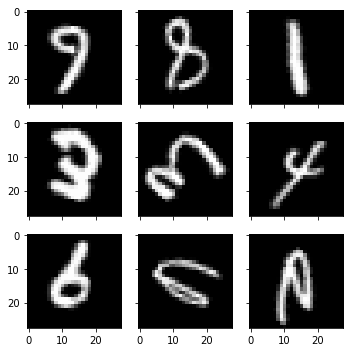

In [13]:
# View the augmented data
import matplotlib.pyplot as plt

fig, axes = plt.subplots(ncols=3, nrows=3, figsize=(5, 5), sharex=True, sharey=True)
ax = axes.ravel()

for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        ax[i].imshow(X_batch[i, ..., 0], cmap='gray')

    fig.tight_layout()
    plt.show()
    break

In [12]:
model = Sequential()
# 32 3x3 filters (extracting 5x5-pixel subregions), with ReLU activation
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=X_train.shape[1:]))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))# Apply max filter to every 2x2 patch
model.add(Dropout(0.25)) # Drop 25% of inputs to prevent overfitting
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss=categorical_crossentropy,
              optimizer=SGD(momentum=0.9, nesterov=True),
              metrics=['accuracy'])

batch_size = 128
loss = model.fit_generator(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=X_train.shape[0] // batch_size,
    epochs=3,
    verbose=1,
    validation_data=(X_test, y_test))

Epoch 1/3
469/469 [==============================] - 96s 205ms/step - loss: 1.0352 - acc: 0.6520 - val_loss: 0.4678 - val_acc: 0.8499
Epoch 2/3
469/469 [==============================] - 101s 215ms/step - loss: 0.4828 - acc: 0.8483 - val_loss: 0.3077 - val_acc: 0.9002
Epoch 3/3
469/469 [==============================] - 116s 248ms/step - loss: 0.3440 - acc: 0.8914 - val_loss: 0.2482 - val_acc: 0.9191
